In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt

In [20]:
train = pd.read_csv("train.csv", parse_dates=['srch_ci', 'srch_co'],nrows=10000000)

In [21]:
train = train.sample(frac=0.1, replace=True)

In [22]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
6067628,2013-10-21 19:38:40,2,3,66,442,12416,139.1142,87390,0,0,...,0,1,26943,6,0,2,2,50,743,50
6407474,2013-05-19 16:34:47,37,1,69,693,19647,NaN,996580,0,1,...,2,1,8254,1,0,1,2,50,365,72
4917901,2014-11-03 11:11:49,24,2,3,50,5703,NaN,705832,1,0,...,0,1,5497,1,0,1,3,182,79,63
9931425,2014-07-27 11:21:29,2,3,66,174,16634,732.2374,1029468,0,0,...,2,1,293,1,0,1,2,50,1631,50
6916460,2014-09-21 15:54:17,2,3,66,258,11246,NaN,1163667,1,0,...,2,1,4380,3,1,1,2,50,366,91


Column name    |    Description    |    Data type
---| ---| ---
date_time    |    Timestamp    |    string
site_name    |    ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...)    |    int
posa_continent    |    ID of continent associated with site_name    |    int
user_location_country    |    The ID of the country the customer is located    |    int
user_location_region    |    The ID of the region the customer is located    |    int
user_location_city    |    The ID of the city the customer is located    |    int
orig_destination_distance    |    Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated    |    double
user_id    |    ID of user    |    int
is_mobile    |    1 when a user connected from a mobile device, 0 otherwise    |    tinyint
is_package    |    1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise    |    int
channel    |    ID of a marketing channel    |    int
srch_ci    |    Checkin date    |    string
srch_co    |    Checkout date    |    string
srch_adults_cnt    |    The number of adults specified in the hotel room    |    int
srch_children_cnt    |    The number of (extra occupancy) children specified in the hotel room    |    int
srch_rm_cnt    |    The number of hotel rooms specified in the search    |    int
srch_destination_id    |    ID of the destination where the hotel search was performed    |    int
srch_destination_type_id    |    Type of destination    |    int
hotel_continent    |    Hotel continent    |    int
hotel_country    |    Hotel country    |    int
hotel_market    |    Hotel market    |    int
is_booking    |    1 if a booking, 0 if a click    |    tinyint
cnt    |    Numer of similar events in the context of the same user session    |    bigint
hotel_cluster    |    ID of a hotel cluster    |    int
Column name    |    Description    |    Data type
srch_destination_id    |    ID of the destination where the hotel search was performed    |    int
d1-d149    |    latent description of search regions    |    double

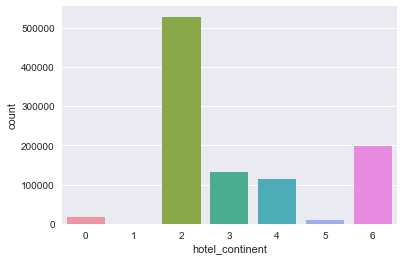

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# preferred continent destinations
sns.countplot(x='hotel_continent', data=train)

##### continent 2 has the most preferred destinations

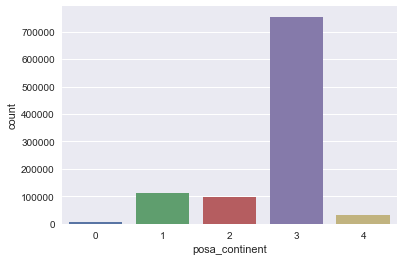

In [26]:
sns.countplot(x='posa_continent', data=train)

##### Travel geeks of the world reside in continent 3

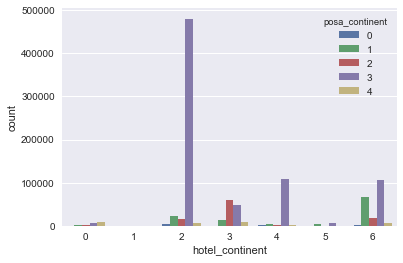

In [27]:
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

In [28]:
import datetime as dt
from datetime import datetime
datetime.strptime("2014-08-31", '%Y-%m-%d')

datetime.datetime(2014, 8, 31, 0, 0)

In [29]:
def conv_time(x):
    try:
        return datetime.strptime(x, '%Y-%m-%d')
    except:
        return None

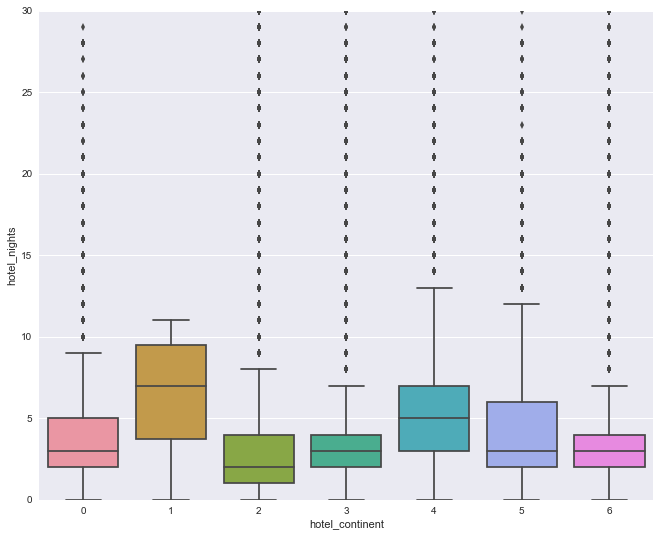

In [30]:
hotel_nights = pd.to_datetime(train['srch_co']) - pd.to_datetime(train['srch_ci']) 
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float) # convert to float to avoid NA problems
train['hotel_nights'] = hotel_nights
plt.figure(figsize=(11, 9))
ax = sns.boxplot(x='hotel_continent', y='hotel_nights', data=train)
lim = ax.set(ylim=(0, 30))

In [31]:
train.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,hotel_nights
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,641372.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,998718.000000
mean,9.737161,2.689146,86.375094,304.442110,27702.43775,1965.873478,6.006369e+05,0.134113,0.247938,5.882691,...,1.113545,14419.337374,2.583815,0.079798,1.483780,3.145417,81.320852,600.392306,49.783961,3.364234
std,11.874901,0.735132,60.013889,205.282365,16800.98991,2231.280279,3.525259e+05,0.340774,0.431816,3.712913,...,0.464234,11046.323675,2.154788,0.270980,1.220183,1.614274,56.232479,510.795173,28.911806,3.187401
min,2.000000,0.000000,0.000000,0.000000,0.00000,0.005600,2.000000e+00,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-321.000000
25%,2.000000,3.000000,66.000000,174.000000,12841.00000,309.549675,2.893820e+05,0.000000,0.000000,2.000000,...,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.000000,171.000000,25.000000,1.000000
50%,2.000000,3.000000,66.000000,311.000000,27607.00000,1137.157500,5.971640e+05,0.000000,0.000000,9.000000,...,1.000000,9145.000000,1.000000,0.000000,1.000000,2.000000,50.000000,593.000000,49.000000,3.000000
75%,13.000000,3.000000,75.000000,385.000000,42328.00000,2551.562325,9.090850e+05,0.000000,0.000000,9.000000,...,1.000000,18790.000000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000,4.000000
max,53.000000,4.000000,239.000000,1027.000000,56507.00000,12404.419600,1.198784e+06,1.000000,1.000000,10.000000,...,8.000000,65102.000000,9.000000,1.000000,67.000000,6.000000,212.000000,2117.000000,99.000000,365.000000


In [32]:
train.corr(method='spearman')

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,hotel_nights
site_name,1.000000,-0.628553,0.218615,-0.031437,-0.022502,0.079527,0.035834,-0.020756,0.037244,-0.051682,...,0.009790,0.004086,-0.004496,-0.012343,0.020935,0.214937,0.301606,-0.125237,-0.025924,0.041109
posa_continent,-0.628553,1.000000,0.244160,0.180142,0.073428,0.062840,-0.021761,0.025100,-0.071848,0.108135,...,-0.027007,0.024410,0.045553,0.013253,-0.018188,-0.317102,-0.209085,0.135493,0.016961,-0.040758
user_location_country,0.218615,0.244160,1.000000,0.205072,0.126461,0.095007,-0.026038,0.017255,-0.000582,0.093067,...,0.001256,0.013551,0.029562,0.005675,0.000685,-0.058236,0.035830,0.041569,-0.007028,0.030019
user_location_region,-0.031437,0.180142,0.205072,1.000000,0.132948,0.049302,-0.016246,0.021002,0.037646,0.019480,...,0.001709,0.030063,0.011517,0.010717,-0.011185,-0.038493,-0.087389,0.077596,0.011597,0.030399
user_location_city,-0.022502,0.073428,0.126461,0.132948,1.000000,0.021209,-0.010586,-0.000347,0.016010,0.029410,...,0.001858,0.000331,-0.000724,0.001693,-0.002095,-0.003587,-0.013339,0.008354,0.001001,0.021574
orig_destination_distance,0.079527,0.062840,0.095007,0.049302,0.021209,1.000000,0.007040,-0.054379,0.193396,-0.000872,...,-0.006120,-0.074171,-0.077847,-0.054636,0.032306,0.498052,0.189454,-0.187191,0.020012,0.371995
user_id,0.035834,-0.021761,-0.026038,-0.016246,-0.010586,0.007040,1.000000,-0.003574,-0.012821,-0.001944,...,0.000128,0.001164,0.005765,0.001390,0.000056,0.004479,0.011942,-0.008913,0.000655,-0.003035
is_mobile,-0.020756,0.025100,0.017255,0.021002,-0.000347,-0.054379,-0.003574,1.000000,0.051072,-0.027323,...,-0.018706,-0.005971,-0.015771,-0.031967,0.012955,-0.023409,-0.032331,0.015236,0.009310,0.013270
is_package,0.037244,-0.071848,-0.000582,0.037646,0.016010,0.193396,-0.012821,0.051072,1.000000,-0.008748,...,-0.023512,-0.149851,-0.232134,-0.077606,0.114295,0.148819,-0.063742,-0.043713,0.042201,0.379603
channel,-0.051682,0.108135,0.093067,0.019480,0.029410,-0.000872,-0.001944,-0.027323,-0.008748,1.000000,...,0.005798,0.003747,0.023563,0.023760,-0.014248,-0.025983,-0.012154,0.009085,0.000677,-0.021123


In [33]:
from collections import Counter
Counter(train["srch_ci"].isnull())

Counter({False: 1000000})

In [34]:
Counter(train["srch_co"] > '2017-01-01')

Counter({False: 998717, True: 1283})